# **Predicting Diabetes**

**Problem Statement:**

Diabetes is a chronic disease that affects millions of people worldwide, leading to serious health complications if not diagnosed and managed early. Early prediction of diabetes can enable timely intervention and improve patient outcomes.

This project aims to build a predictive model using diagnostic measurements to determine whether a patient has diabetes. The dataset used in this project originates from the National Institute of Diabetes and Digestive and Kidney Diseases and contains various health indicators such as glucose level, blood pressure, body mass index, and age.

**Objective:**
To analyze the dataset and develop an accurate machine learning model that predicts the onset of diabetes in patients based on their diagnostic features.

### **Exploratory Data Analysis (EDA)**

###  **Importing Libraries**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

###  **Problem statement and data collection**

In [55]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### **Exploration and data cleaning**

**Understanding the features**

- **Pregnancies**: Number of pregnancies of the patient (numeric)

- **Glucose**: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

- **BloodPressure**: Diastolic blood pressure (measured in mm Hg) (numeric)

- **SkinThickness**: Triceps skin fold thickness (measured in mm) (numeric)

- **Insulin**: 2-hour serum insulin (measured in mu U/ml) (numeric)

- **BMI**: Body mass index (numeric)

- **DiabetesPedigreeFunction**: Diabetes Pedigree Function (numeric)

- **Age**: Age of patient (numeric)

- **Outcome**: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [56]:
print('The dataframe contains {} rows and it has {} features.'.format(len(total_data), total_data.shape[1]))

The dataframe contains 768 rows and it has 9 features.


In [57]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset Overview and Analysis
- Total records: 768

- Features: 8 predictor variables + 1 target variable

- No missing values: All columns have 768 non-null entries, meaning the dataset is complete with no missing data.

- Data types: Majority are integer features, except BMI and Diabetes Pedigree Function which are floats. The target variable Outcome is binary (0 or 1).

Since there are no missing values, we can directly proceed to exploring the data distributions and relationships.

Some variables like Glucose, BloodPressure, SkinThickness, Insulin, and BMI are medical measurements and may contain zero values that are physiologically unlikely. These zeros could indicate missing or erroneous data and might need to be handled during preprocessing.

The Outcome variable is binary, so this is a classification problem.

**Eliminate duplicates**

In [58]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

The dataset don't have any nulls neither duplicated values in the dataframe.

**Eliminate irrelevant information**

All features are medically relevant to diabetes risk and may provide valuable information for predicting our target. All features are retained initially to let the model and further analysis determine their importance.

In [59]:
clean_data = total_data.copy()
clean_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### **Analysis of univariate variables**

**Categorical Variables - Analysis and Conclusions**

In [60]:
categorical_variables = clean_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

Categorical Variables: []


Because our dataset consists solely of numerical variables, categorical analysis is not applicable.

**Numerical Variables - Analysis and Conclusions**

In [61]:
numerical_variables = clean_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


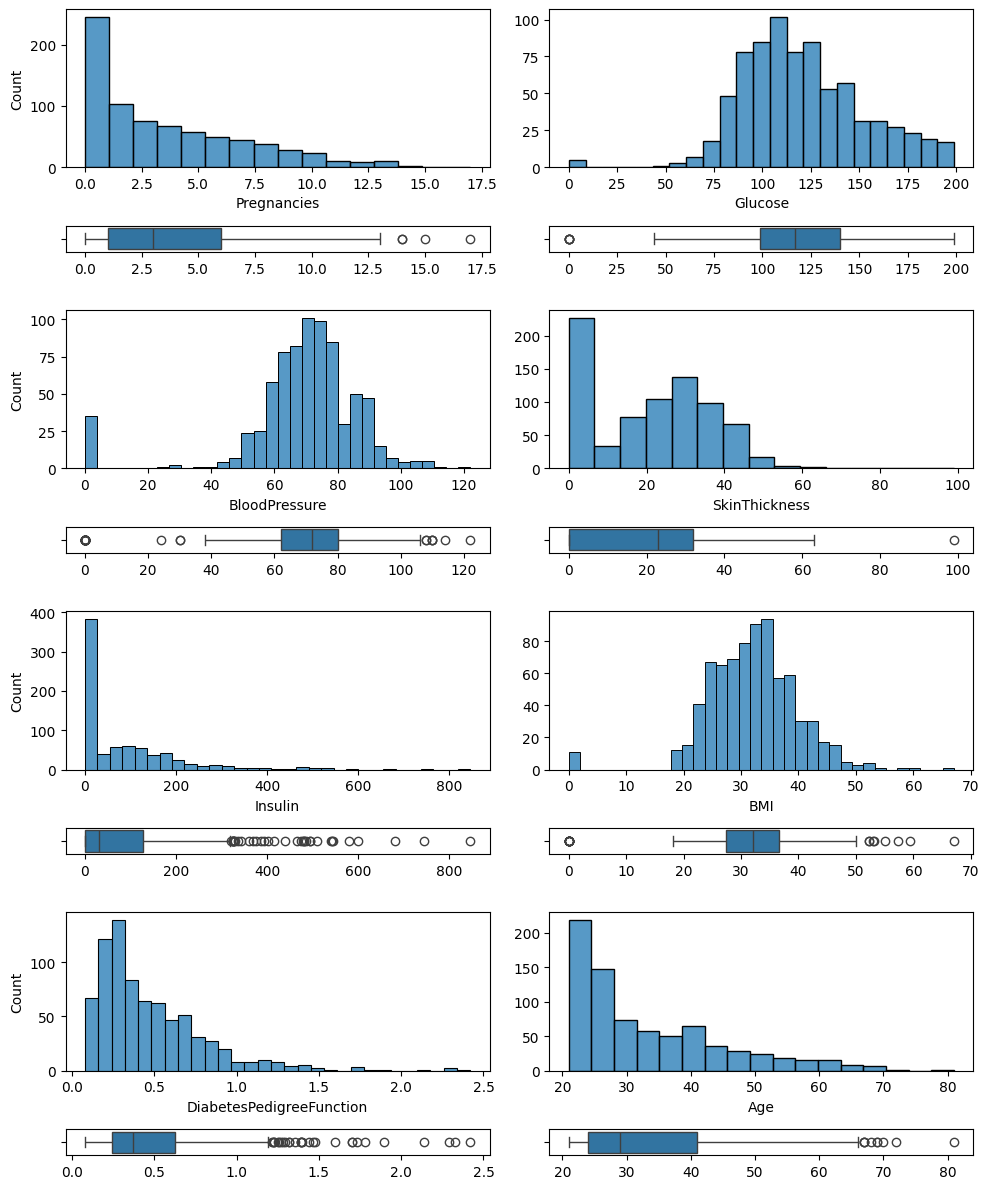

In [62]:
fig, ax = plt.subplots(8, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = clean_data, x='Pregnancies')
sns.boxplot(ax = ax[1,0], data = clean_data, x='Pregnancies').set(xlabel = None)
sns.histplot(ax = ax[0,1], data = clean_data, x='Glucose').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = clean_data, x='Glucose').set(xlabel = None)

# Charts second row 
sns.histplot(ax = ax[2,0], data = clean_data, x='BloodPressure')
sns.boxplot(ax = ax[3,0], data = clean_data, x='BloodPressure').set(xlabel = None)
sns.histplot(ax = ax[2,1], data = clean_data, x='SkinThickness').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = clean_data, x='SkinThickness').set(xlabel = None)

# Charts third row
sns.histplot(ax = ax[4,0], data = clean_data, x='Insulin')
sns.boxplot(ax = ax[5,0], data = clean_data, x='Insulin').set(xlabel = None)
sns.histplot(ax = ax[4,1], data = clean_data, x='BMI').set(ylabel = None)
sns.boxplot(ax = ax[5,1], data = clean_data, x='BMI').set(xlabel = None)

# Charts fourth row
sns.histplot(ax = ax[6,0], data = clean_data, x='DiabetesPedigreeFunction')
sns.boxplot(ax = ax[7,0], data = clean_data, x='DiabetesPedigreeFunction').set(xlabel = None)
sns.histplot(ax = ax[6,1], data = clean_data, x='Age').set(ylabel = None)
sns.boxplot(ax = ax[7,1], data = clean_data, x='Age').set(xlabel = None)

plt.tight_layout()
plt.show()

### **Multivariate Analysis**

**- Numerical vs Numerical Analysis**

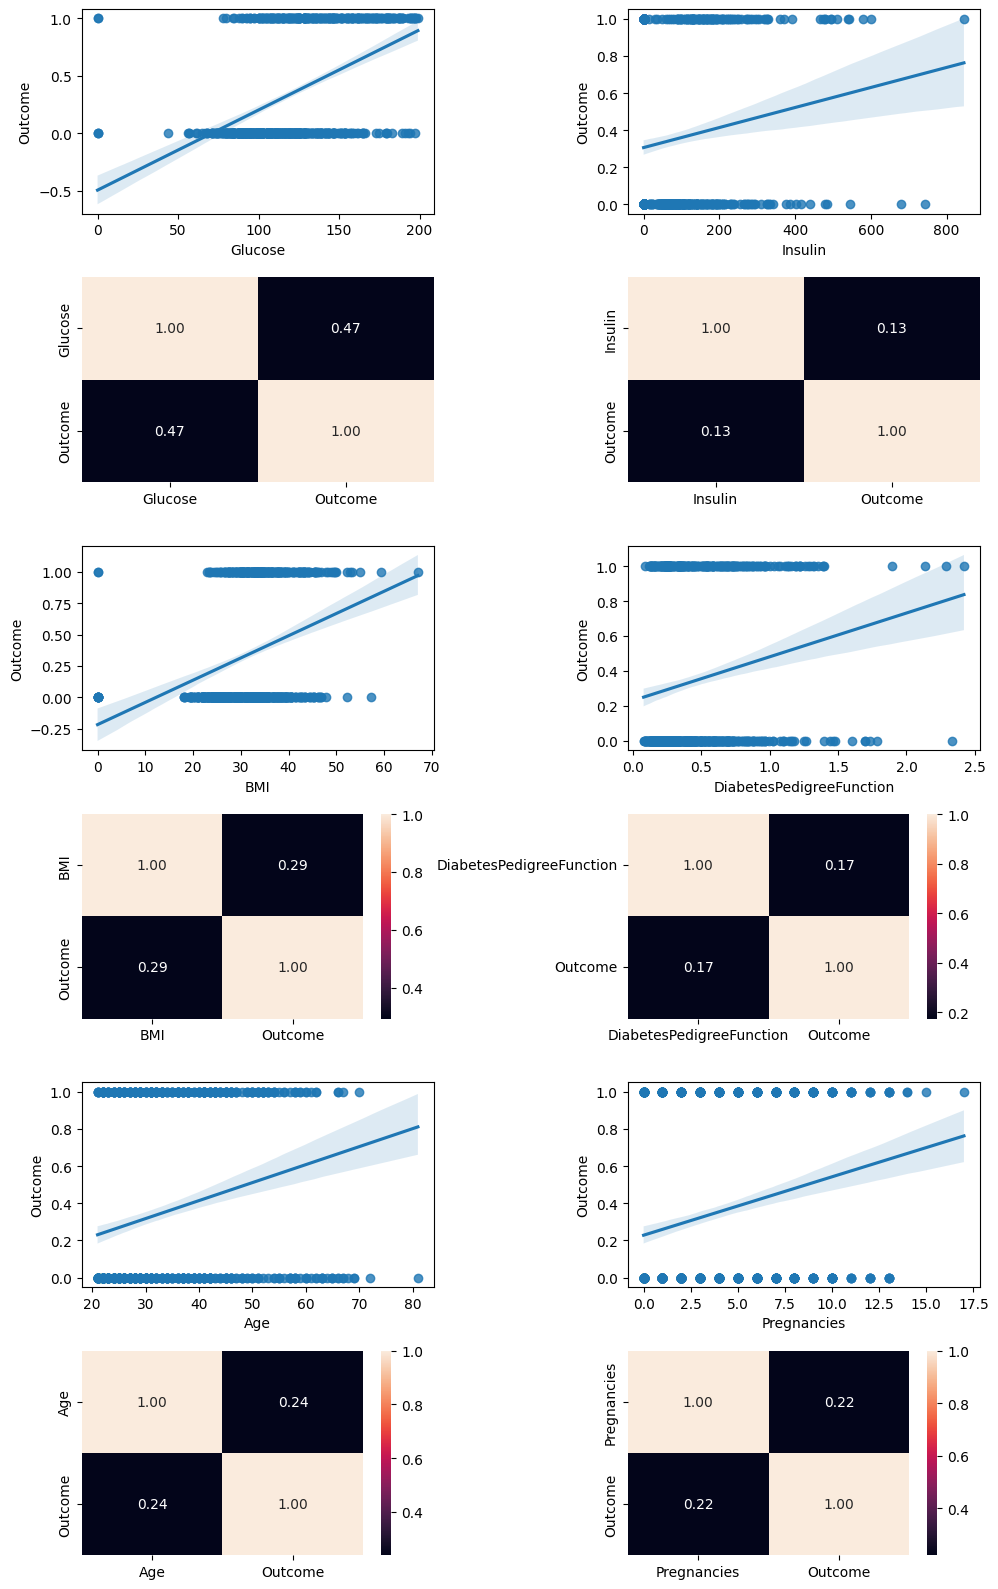

In [63]:
fig, axis = plt.subplots(6,2 , figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = clean_data, x = "Glucose", y = "Outcome")
sns.heatmap(clean_data[["Glucose", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = clean_data, x = "Insulin", y = "Outcome")
sns.heatmap(clean_data[["Insulin", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = clean_data, x = "BMI", y = "Outcome")
sns.heatmap(clean_data[["BMI", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = clean_data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(clean_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[4, 0], data = clean_data, x = "Age", y = "Outcome")
sns.heatmap(clean_data[["Age", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0]).set(ylabel = None)

sns.regplot(ax = axis[4, 1], data = clean_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(clean_data[["Pregnancies", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1]).set(ylabel = None)


plt.tight_layout()

plt.show()

Conclusions

- Glucose is the strongest predictor of diabetes among the features analyzed, showing a clear positive association with diabetes occurrence.

- BMI and Age also contribute meaningfully to predicting diabetes, reflecting the known impact of body weight and aging on diabetes risk.

- Pregnancies and Diabetes Pedigree Function offer additional predictive value, though their individual correlations with diabetes are relatively lower.

- Insulin levels exhibit the weakest correlation with diabetes outcome in this dataset, suggesting limited standalone predictive power.

The scatterplots reveal some overlap between diabetic and non-diabetic cases for all features, indicating that no single variable can perfectly distinguish between classes—highlighting the need for multivariate modeling.

The observed confidence intervals imply variability and uncertainty in predictions based on individual features, underscoring the importance of combining multiple predictors for robust diabetes classification.

**Analysing all the Data at Once**

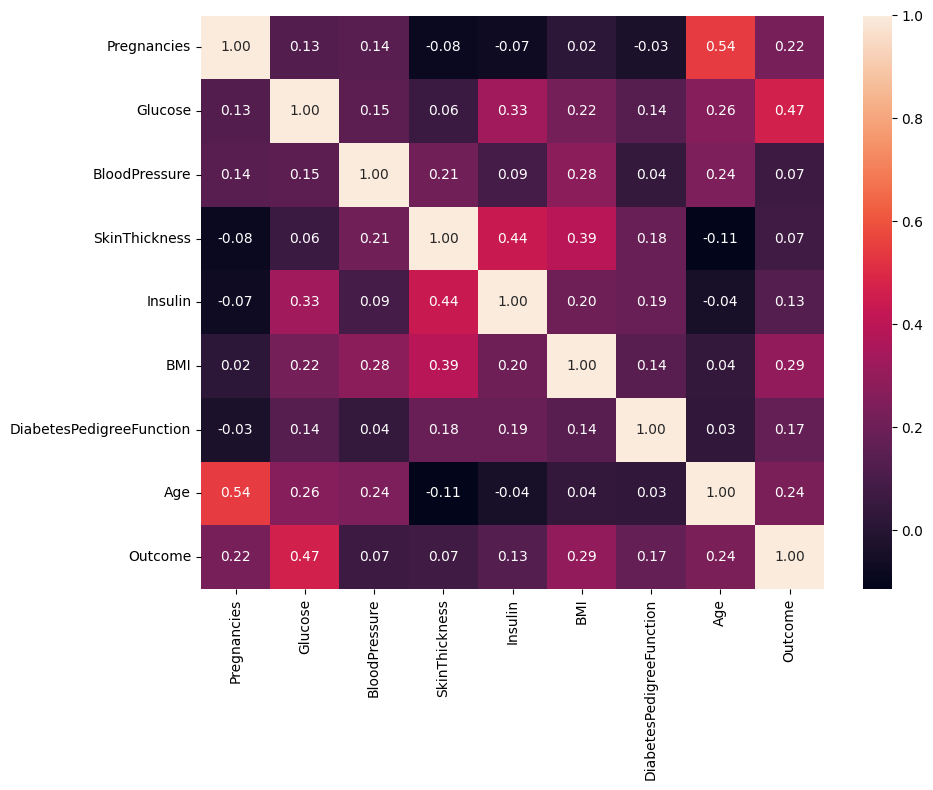

In [64]:
fig, axes = plt.subplots(figsize=(10, 8))

sns.heatmap(clean_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction", "Age", "Outcome" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Conclusions

1- Strongest Correlations:

- Age and Pregnancies: Positive correlation of 0.54, indicating that older individuals tend to have more pregnancies.

- Glucose and Outcome: Positive correlation of 0.47, suggesting that higher glucose levels are associated with a higher likelihood of diabetes.

- SkinThickness and Insulin: Positive correlation of 0.44, showing that higher skin thickness tends to correspond with higher insulin levels.

2- Moderate Correlations:

- BMI and Outcome: Correlation of 0.29, indicating a moderate relationship between body mass index and diabetes occurrence.

- Glucose and Insulin: Correlation of 0.33, showing a moderate link between glucose levels and insulin.

3- Weak or Negligible Correlations:

- BloodPressure shows weak correlations with most variables, including the outcome (0.07), implying it may not be a strong predictor on its own.

- DiabetesPedigreeFunction has generally low correlations with other variables, suggesting its independent contribution might be subtle but potentially useful in combination with others.

4- Negative Correlations:

- SkinThickness and Age show a small negative correlation (-0.11), indicating a slight tendency for skin thickness to decrease with age.

- Other negative correlations are minor and likely not significant for modeling.



Glucose is the strongest predictor of diabetes outcome, followed by BMI and Age.

Age and Pregnancies are related, which could be considered when modeling or interpreting results.

Some variables (BloodPressure, DiabetesPedigreeFunction) show weak correlations, so feature engineering or transformations might be needed to improve predictive power.

SkinThickness and Insulin are moderately correlated, suggesting a biological link that could be explored further in modeling.

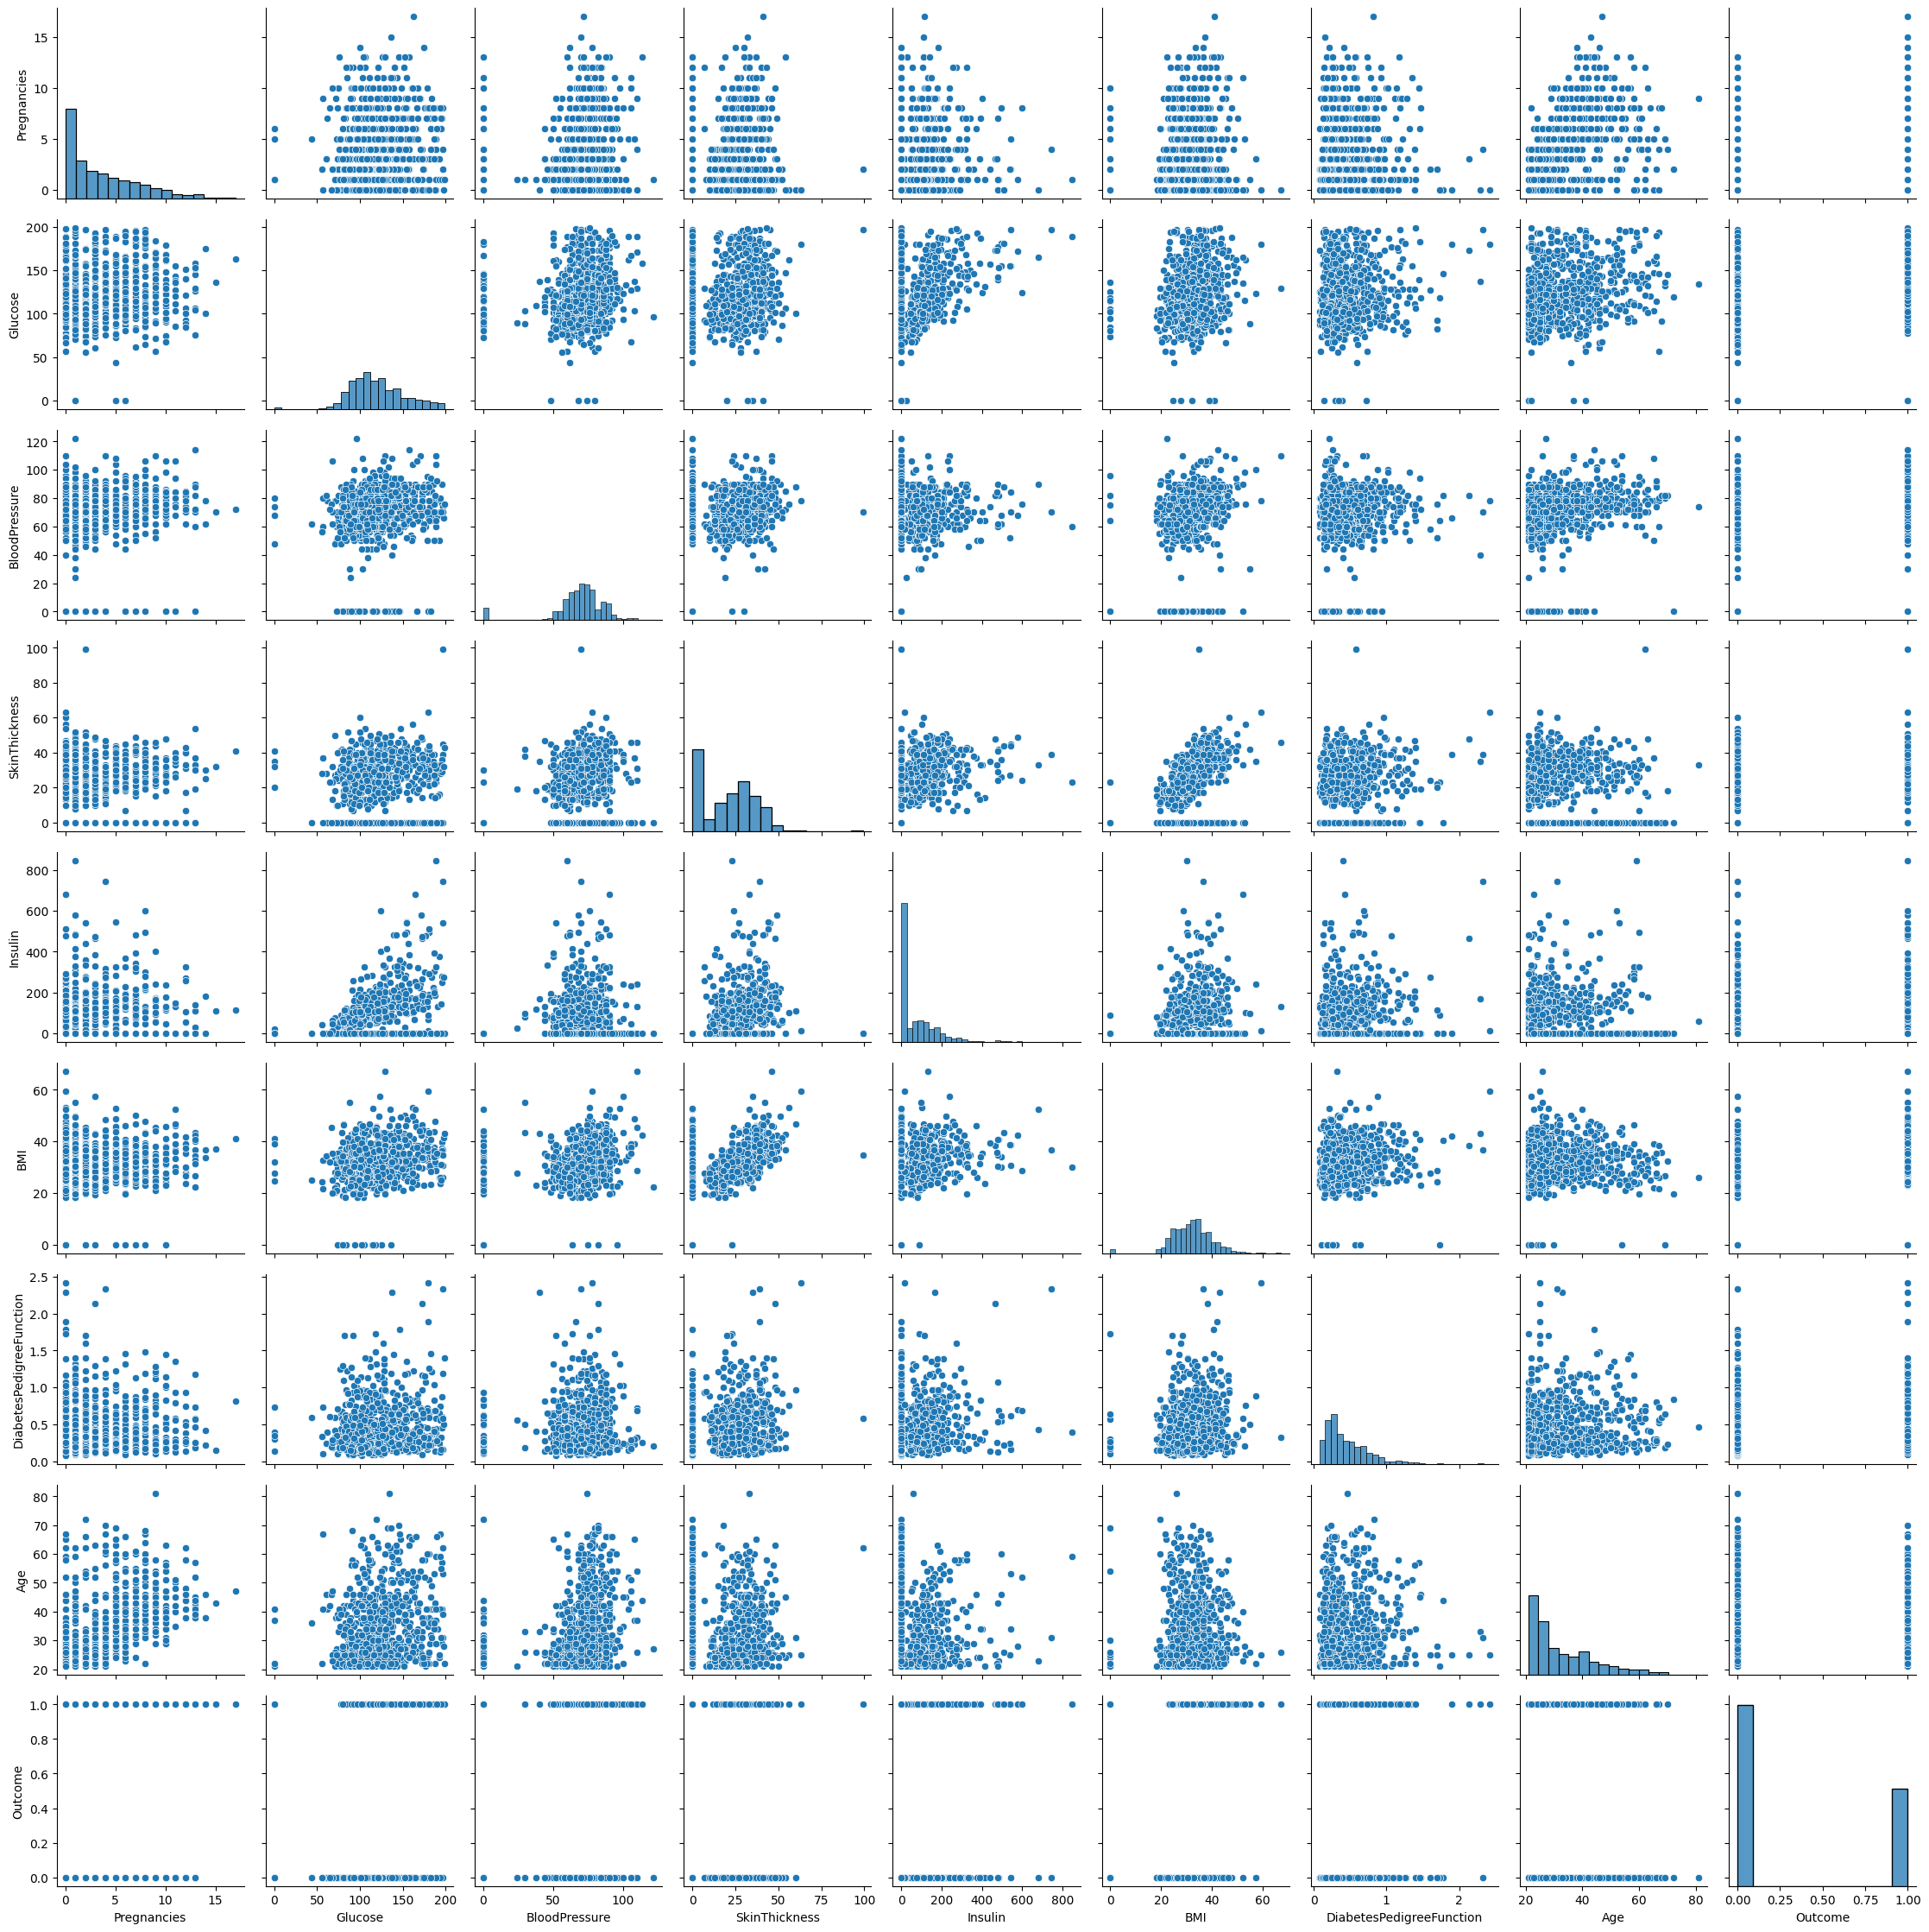

In [65]:
sns.pairplot(data = clean_data)
plt.tight_layout()
plt.show()

### **Feature Engineering**

**- Outliers Analysis**

In [66]:
clean_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


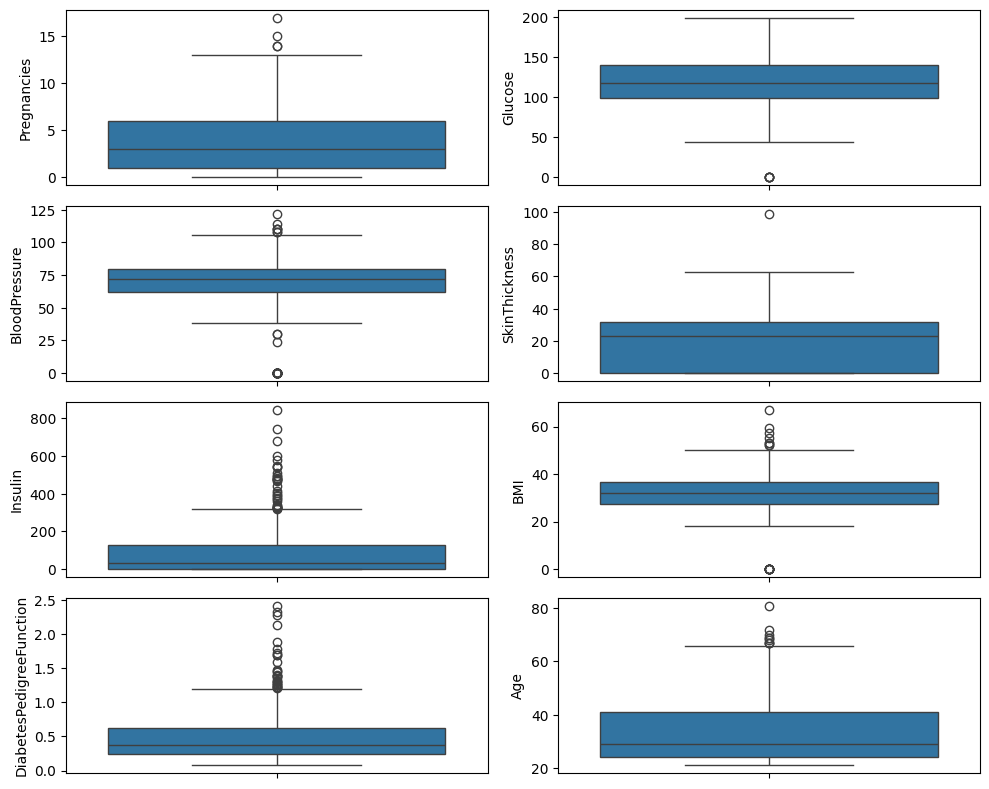

In [67]:
fig, axes = plt.subplots(4, 2, figsize = (10, 8))

sns.boxplot(ax = axes[0, 0], data = clean_data, y = "Pregnancies")
sns.boxplot(ax = axes[0, 1], data = clean_data, y = "Glucose")
sns.boxplot(ax = axes[1, 0], data = clean_data, y = "BloodPressure")
sns.boxplot(ax = axes[1, 1], data = clean_data, y = "SkinThickness")
sns.boxplot(ax = axes[2, 0], data = clean_data, y = "Insulin")
sns.boxplot(ax = axes[2, 1], data = clean_data, y = "BMI")
sns.boxplot(ax = axes[3, 0], data = clean_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axes[3, 1], data = clean_data, y = "Age")


plt.tight_layout()

plt.show()

In [68]:
numerical_columns = clean_data.select_dtypes(include=['number']).columns.tolist()

for column in numerical_columns:
    stats = clean_data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
      lower_limit = 0
    
    outliers = clean_data[(clean_data[column] < lower_limit) | (clean_data[column] > upper_limit)]
    outlier_count = outliers.shape[0]

    print(f"{column.capitalize()} — IQR: {round(iqr, 2)}, Upper limits: {round(upper_limit, 2)}, Lowerlimits: {round(lower_limit, 2)}")
    print(f"Total de outliers: {outlier_count}\n")

Pregnancies — IQR: 5.0, Upper limits: 13.5, Lowerlimits: 0
Total de outliers: 4

Glucose — IQR: 41.25, Upper limits: 202.12, Lowerlimits: 37.12
Total de outliers: 5

Bloodpressure — IQR: 18.0, Upper limits: 107.0, Lowerlimits: 35.0
Total de outliers: 45

Skinthickness — IQR: 32.0, Upper limits: 80.0, Lowerlimits: 0
Total de outliers: 1

Insulin — IQR: 127.25, Upper limits: 318.12, Lowerlimits: 0
Total de outliers: 34

Bmi — IQR: 9.3, Upper limits: 50.55, Lowerlimits: 13.35
Total de outliers: 19

Diabetespedigreefunction — IQR: 0.38, Upper limits: 1.2, Lowerlimits: 0
Total de outliers: 29

Age — IQR: 17.0, Upper limits: 66.5, Lowerlimits: 0
Total de outliers: 9

Outcome — IQR: 1.0, Upper limits: 2.5, Lowerlimits: 0
Total de outliers: 0



**Eliminating outliers**

In [69]:
# Base dataset
clean_data_with_outliers = clean_data.copy()

# Copy to process and remove outliers
clean_data_no_outliers = clean_data.copy()


def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])

  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)

  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['Insulin', 'SkinThickness']:
  clean_data_no_outliers, limit_list = replace_outliers_from_column(column, clean_data_no_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Insulin': [0, np.float64(318.125)], 'SkinThickness': [0, np.float64(80.0)]}

In [70]:
clean_data_with_outliers.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [71]:
clean_data_no_outliers.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1


**Split Train & Test**

In [72]:
# Define numeric features
num_features = ["Pregnancies", "BloodPressure", "BMI", "Glucose" ,"SkinThickness", "Insulin", "Age", "DiabetesPedigreeFunction" ]

# Define target
target = "Outcome"

# Dataset with outliers
x_WITH = clean_data_with_outliers[num_features]
y = clean_data_with_outliers[target]
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test_split(x_WITH, y, test_size=0.2, random_state=42)

# Dataset without outliers
x_NO = clean_data_no_outliers[num_features]
X_train_no_outliers, X_test_no_outliers = train_test_split(x_NO, test_size=0.2, random_state=42)

**Feature Selection**

In [73]:
def select_features_classification(X_train, X_test, y_train, k=7, score_func=mutual_info_classif):
    
    selector = SelectKBest(score_func=score_func, k=k)
    selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X_train.columns[selector.get_support()] 

    # Transform datasets
    X_train_sel = pd.DataFrame(selector.transform(X_train), columns=selected_features, index=X_train.index)
    X_test_sel = pd.DataFrame(selector.transform(X_test), columns=selected_features, index=X_test.index)


    return X_train_sel, X_test_sel, selected_features


In [74]:
# Apply feature selection on dataset WITH outliers

X_train_with_outliers_sel, X_test_with_outliers_sel, selected_features = select_features_classification(
    X_train_with_outliers, X_test_with_outliers, y_train, k=7
)

X_train_with_outliers_sel.head(3)

,Pregnancies,BMI,Glucose,SkinThickness,Insulin,Age,DiabetesPedigreeFunction
60,2.0,0.0,84.0,0.0,0.0,21.0,0.304
618,9.0,28.2,112.0,24.0,0.0,50.0,1.282
346,1.0,28.7,139.0,19.0,83.0,22.0,0.654


In [75]:
# Apply feature selection on dataset NO outliers

X_train_no_outliers_sel, X_test_no_outliers_sel, selected_features = select_features_classification(
    X_train_no_outliers, X_test_no_outliers, y_train, k=7
)

X_train_no_outliers_sel.head(3)

,Pregnancies,BloodPressure,BMI,Glucose,Insulin,Age,DiabetesPedigreeFunction
60,2.0,0.0,0.0,84.0,0.0,21.0,0.304
618,9.0,82.0,28.2,112.0,0.0,50.0,1.282
346,1.0,46.0,28.7,139.0,83.0,22.0,0.654


**Save the clean and raw data**

In [113]:
dataframes = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_test_with_outliers": X_test_with_outliers,
    "X_test_no_outliers": X_test_no_outliers,
    "X_train_with_outliers_sel": X_train_with_outliers_sel,
    "X_test_with_outliers_sel": X_test_with_outliers_sel,
    "X_train_no_outliers_sel": X_train_no_outliers_sel,
    "X_test_no_outliers_sel": X_test_no_outliers_sel,
    "y_train": y_train,
    "y_test": y_test,
    }

# Base path to save the files
save_path = "../data/processed/"

# Save the DataFrames in CSV
for name, df in dataframes.items():
    df.to_csv(f"{save_path}{name}.csv", index=False)

### **Machine Learning**


#### **Random Forest Model**

In [77]:
# Define dataset pairs (train and test together)
dataset_pairs = {
    "with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "no_outliers": (X_train_no_outliers, X_test_no_outliers),
    "with_outliers_sel": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "no_outliers_sel": (X_train_no_outliers_sel, X_test_no_outliers_sel)
}

# Train, predict and evaluate accuracy for each dataset
results = {
    name: accuracy_score(
        y_test, 
        RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
        .fit(X_train, y_train)
        .predict(X_test)
    )
    for name, (X_train, X_test) in dataset_pairs.items()
}

best_dataset = max(results, key=results.get)
print(f"Accuracy by dataset: {results}\nBest dataset: {best_dataset} with accuracy = {results[best_dataset]:.4f}")

Accuracy by dataset: {'with_outliers': 0.7467532467532467, 'no_outliers': 0.7402597402597403, 'with_outliers_sel': 0.7532467532467533, 'no_outliers_sel': 0.7532467532467533}
Best dataset: with_outliers_sel with accuracy = 0.7532


In [83]:
X_train_final, X_test_final = dataset_pairs[best_dataset]

# Train the model with the best dataset
final_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
final_model.fit(X_train_final, y_train)

# Evaluate the model
y_pred_final = final_model.predict(X_test_final)

print("Inicial Accuracy:", accuracy_score(y_test, y_pred_final))

Inicial Accuracy: 0.7532467532467533


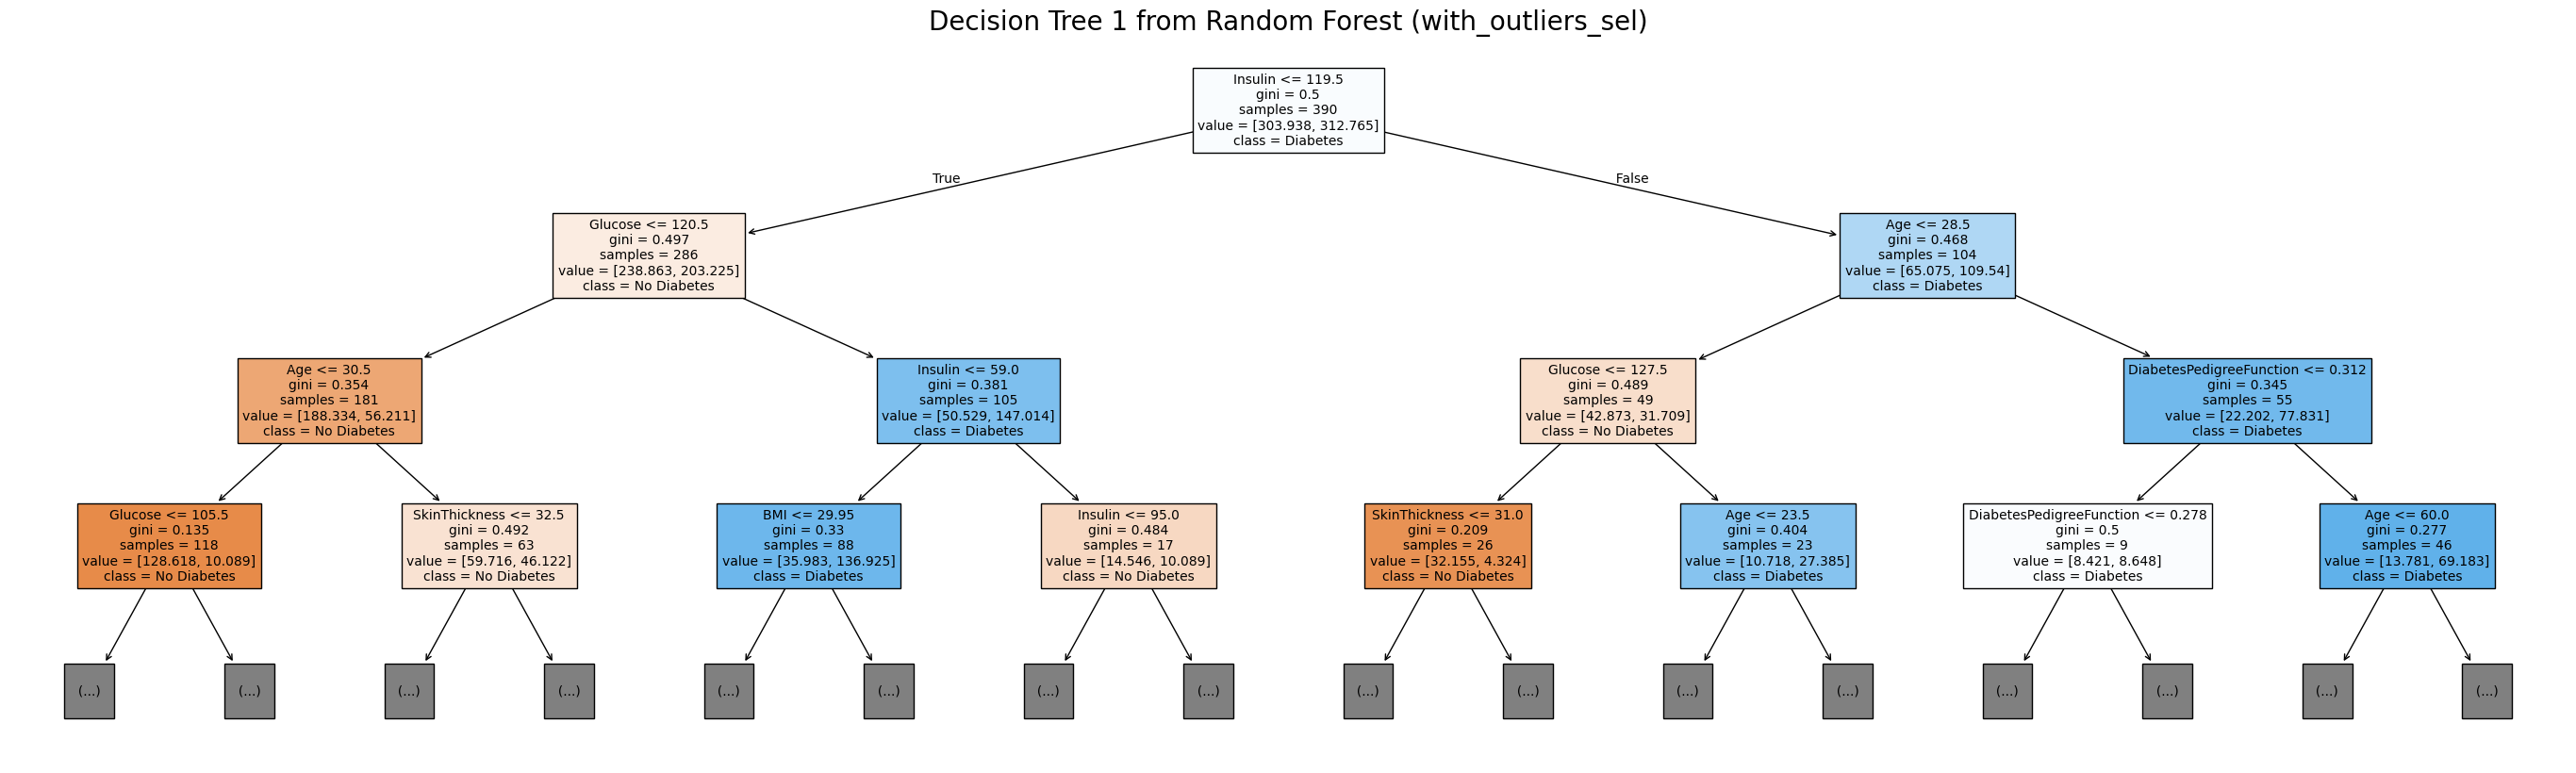

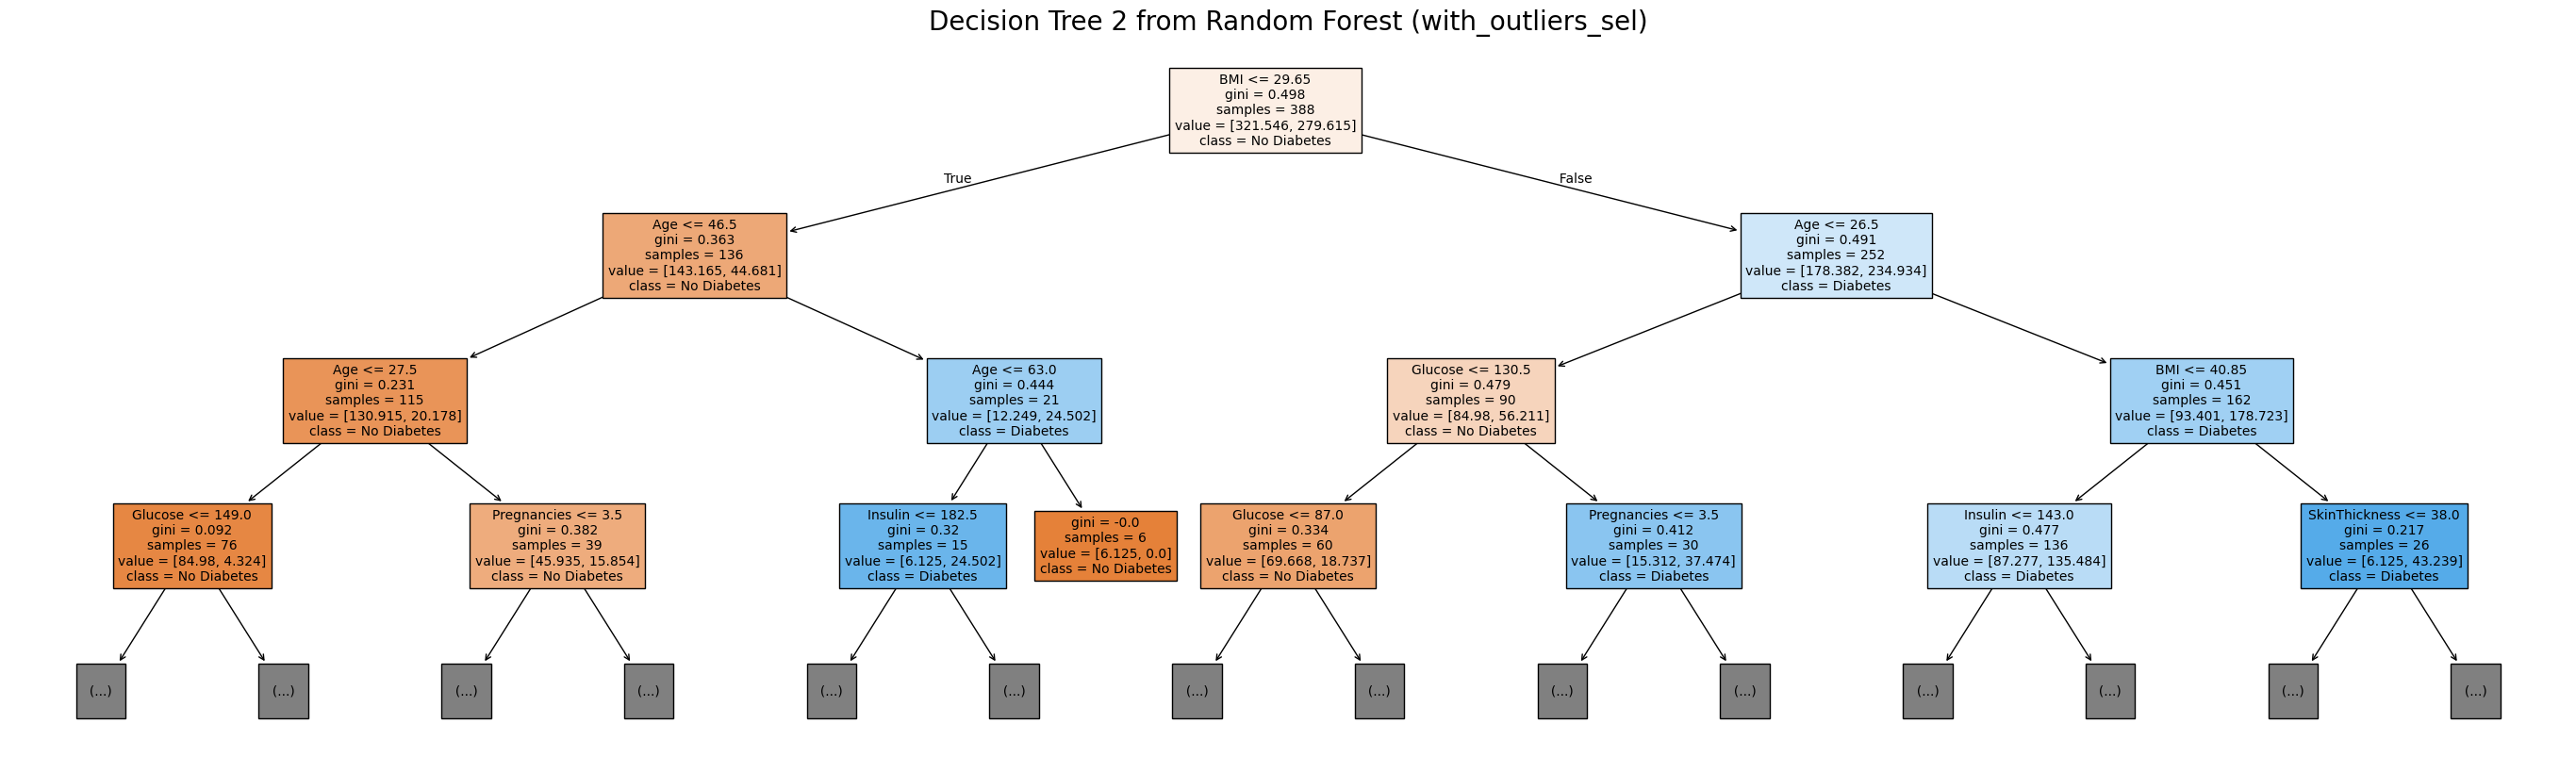

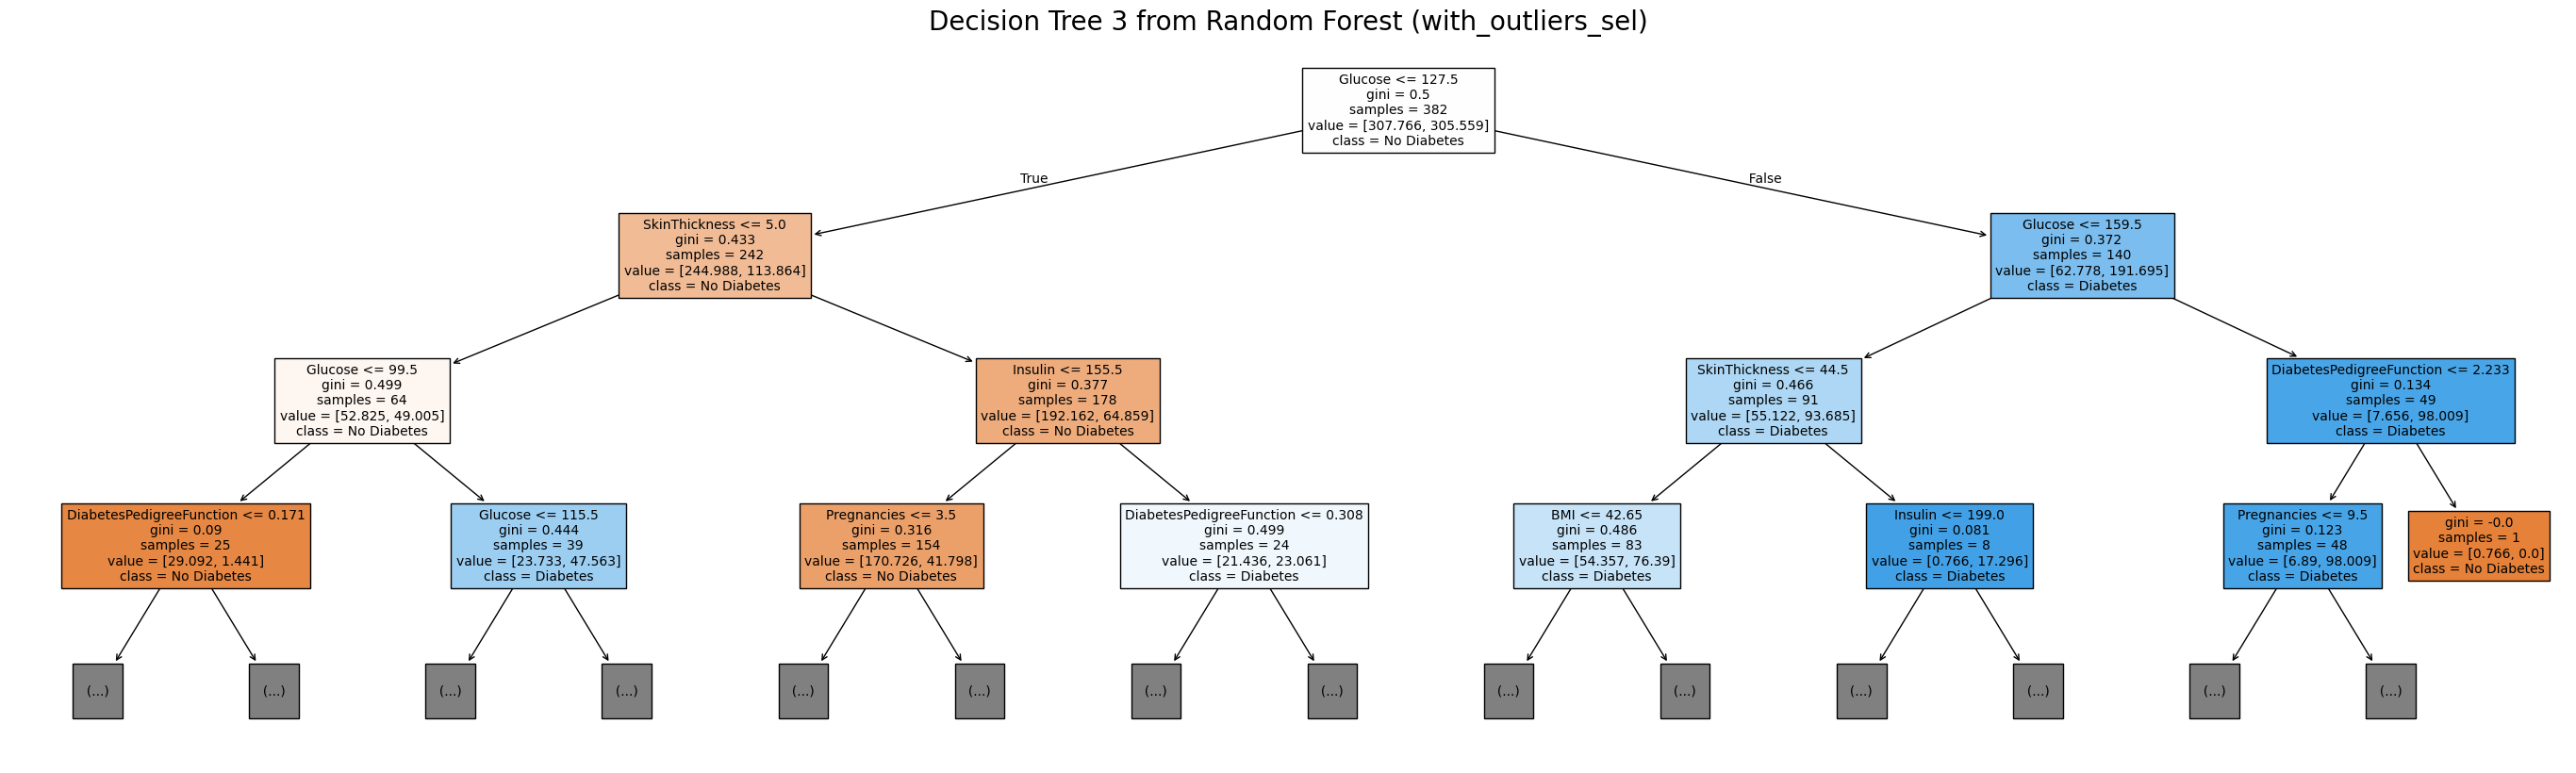

In [111]:
# Plot the trained Random Forest
for i in range(3):
    fig, ax = plt.subplots(figsize=(35, 10)) 
    plot_tree(
        final_model.estimators_[i],
        feature_names=X_train_final.columns.tolist(),
        class_names=['No Diabetes', 'Diabetes'],
        filled=True,
        fontsize=10,
        max_depth=3, # use for better visualization in the graphics
        ax=ax  
    )
    ax.set_title(f"Decision Tree {i+1} from Random Forest ({best_dataset})", fontsize=20)
    plt.savefig(f"../Decision_tree_classifier_{i}.png", dpi=300, bbox_inches="tight")
    plt.show()


**GridSearch**

In [ ]:
# Find the best parameters using the best dataset

param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_

print("Best parameters found:", best_params)
print("Best CV score:", grid_search.best_score_)

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}
Best CV score: 0.7801812608290017


In [108]:
# Create final model with the best parameters
best_model = RandomForestClassifier(
    **best_params,
    random_state=42
)

# Train on the full best training dataset
best_model.fit(X_train_final, y_train)

# Evaluate on test set
y_pred_best = best_model.predict(X_test_final)

print(f"Final test accuracy:{accuracy_score(y_test, y_pred_best):.4f}")

Final test accuracy:0.7662


The cross-validation score (≈0.7801) was slightly higher than the final test accuracy (≈0.7662). This drop is expected, as cross-validation is performed on the training set and can be somewhat optimistic, while the test set reflects true generalization on unseen data. The small difference confirms that the model is not overfitting and achieves a solid performance, making it a reliable baseline for this task.

**Save the model**

In [112]:
# Save the trained model
with open("../models/decision_tree_best_model.sav", "wb") as f:
    pickle.dump(final_model, f)

**Evaluation and Predictions**

In [110]:
y_pred_test = best_model.predict(X_test_final)

# Accuracy and classification report
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

print("\nModel Prediction Results:")
print(f"True Negatives (TN): {tn} individuals correctly predicted as NOT diabetics")
print(f"True Positives (TP): {tp} individuals correctly predicted as diabetics")
print(f"False Positives (FP): {fp} individuals incorrectly predicted as diabetics when they aren't")
print(f"False Negatives (FN): {fn} individuals incorrectly predicted as no diabetics when they are\n")
print(f"Accuracy: {test_accuracy*100:.2f}%")
print("Classification Report:\n", classification_rep)



Model Prediction Results:
True Negatives (TN): 80 individuals correctly predicted as NOT diabetics
True Positives (TP): 38 individuals correctly predicted as diabetics
False Positives (FP): 19 individuals incorrectly predicted as diabetics when they aren't
False Negatives (FN): 17 individuals incorrectly predicted as no diabetics when they are

Accuracy: 76.62%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



The classification report shows that the model achieved an overall accuracy of 77%. Performance is stronger for the majority class (non-diabetic), with precision and recall above 0.80. For the minority class (diabetic), precision and recall are lower (≈0.67–0.69), which is expected due to class imbalance. However, detecting nearly 70% of diabetic cases represents a solid baseline for predictive modeling in this context.